### Step 1: Import all the libraries I am going to use.

In [81]:
%pylab inline
import seaborn as sns
import pywt
from pywt import wavedec2

Populating the interactive namespace from numpy and matplotlib


### Step 2: Use the function to generate some random noisy fake data with different features; Index positive means more spread out, index negative means more clustered. 

In [74]:
def generate_fake_data(size, index):
    f_fake_data = randn(size, size)
    lx = np.linspace(-1, 1, size)
    ly = np.linspace(-1, 1, size)
    LX, LY = np.meshgrid(lx, ly)
    L = np.sqrt(LX**2 + LY**2)
    ps = L ** index
    ps[0] = 0
    fake_data = np.real(np.fft.ifftshift(np.fft.ifft2(np.fft.fftshift(ps)*f_fake_data)))
    fake_data = (fake_data - np.mean(fake_data)) / np.std(fake_data)
    return fake_data

### A little bit detour here, let's have some quick sneaks of how many wavelets families are there. 

In [76]:
pywt.families()
pywt.families(short=False)

['Haar',
 'Daubechies',
 'Symlets',
 'Coiflets',
 'Biorthogonal',
 'Reverse biorthogonal',
 'Discrete Meyer (FIR Approximation)',
 'Gaussian',
 'Mexican hat wavelet',
 'Morlet wavelet',
 'Complex Gaussian wavelets',
 'Shannon wavelets',
 'Frequency B-Spline wavelets',
 'Complex Morlet wavelets']

### Step 3: Now let's explore some data with sparse patterns.

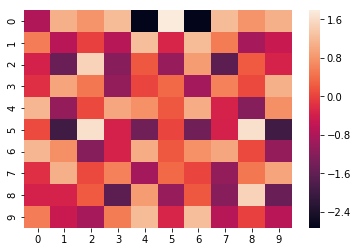

In [75]:
data_sparse=generate_fake_data(10,3)
sns.heatmap(data_sparse)

In [152]:
# Next, I want to apply wavelet 'haar' family to my sparse 
# data, and check our coefficients and how many levels we have

coeffs=wavedec2(data_sparse,'haar')
len(coeffs)-1  # The first element with no imfo in it, so we need to get rid of it, so we have 3 coefficients
               # represent three different multi-scale levels

3

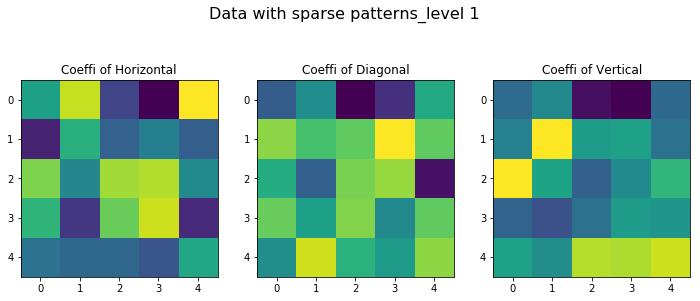

Mean of Horizontal_level(1)= 6.439293542825907e-17
Mean of Diagonal_level(1)= -1.2434497875801754e-16
Mean of Vertical_level(1)= 0.31344699941821075

Standard Deviation of Horizontal_level(1)= 0.93805
Standard Deviation of Diagonal_level(1)= 1.32586
Standard Deviation of Vertical_level(1)= 0.97638

Sum of variance_level(1)= 3.59115



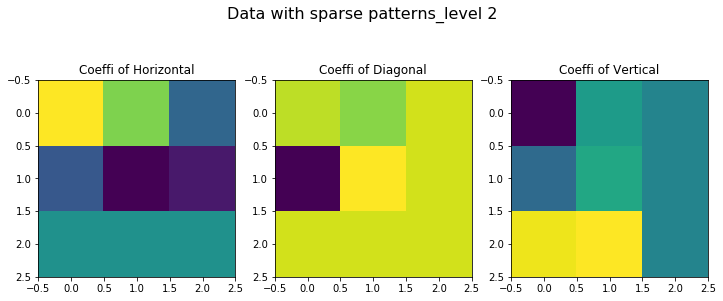

Mean of Horizontal_level(2)= -0.08833648556502806
Mean of Diagonal_level(2)= -0.23220629902630677
Mean of Vertical_level(2)= 0.09244268009234456

Standard Deviation of Horizontal_level(2)= 0.44179
Standard Deviation of Diagonal_level(2)= 0.61368
Standard Deviation of Vertical_level(2)= 0.31462

Sum of variance_level(2)= 0.67077



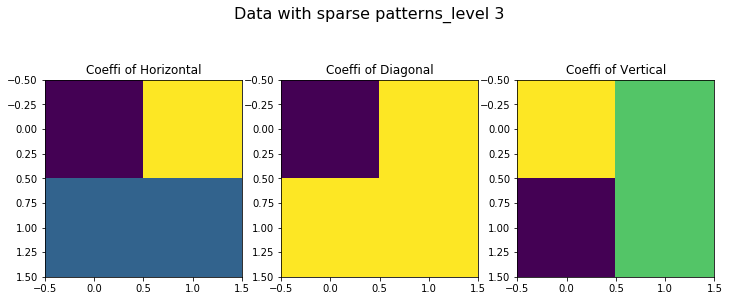

Mean of Horizontal_level(3)= 0.12277437214013862
Mean of Diagonal_level(3)= -0.03665927932063912
Mean of Vertical_level(3)= -0.22169717005770706

Standard Deviation of Horizontal_level(3)= 0.49435
Standard Deviation of Diagonal_level(3)= 0.06350
Standard Deviation of Vertical_level(3)= 0.70710

Sum of variance_level(3)= 0.74840



In [164]:
for i in range(len(coeffs)-1):
    level=i+1
   
    cHn, cVn, cDn=coeffs[-level] # the levels are in reverse order, the last coefficient will be my first level;
                                 # cHn, cVn, cDn would be three differnt directions of filtering;
                                 # level 1 would be more detailed, like zoom in with more details or smaller scale; 
                                 # level 2,3 would be more zoom out with larger-scale featers
    fig,axes=plt.subplots(nrows=1,ncols=3, figsize=(12,8))
    axes[0].imshow(cHn)
    axes[1].imshow(cDn)
    axes[2].imshow(cVn)
    fig.suptitle(f"Data with sparse patterns_level {level}", fontsize=16,y=0.8)
    axes[0].set_title('Coeffi of Horizontal')
    axes[1].set_title('Coeffi of Diagonal')
    axes[2].set_title('Coeffi of Vertical')
    plt.show() # force to run the plt first, just look nicer
    print(f'Mean of Horizontal_level({level})= {cHn.mean()}')
    print(f'Mean of Diagonal_level({level})= {cDn.mean()}')
    print(f'Mean of Vertical_level({level})= {cVn.mean()}')
    print()
    print(f'Standard Deviation of Horizontal_level({level})= {cHn.std():.5f}')
    print(f'Standard Deviation of Diagonal_level({level})= {cDn.std():.5f}')
    print(f'Standard Deviation of Vertical_level({level})= {cVn.std():.5f}')
    print()
    sum_var=cHn.var() +cDn.var() +cVn.var()
    print(f'Sum of variance_level({level})= {sum_var:.5f}')
    print()
    
# From the figure below, we can see that sparse patterns will have
# more info in level 1; because sparse patterns can better be seen
# with zoom-in effect; can tell this by looking at sparse std is
# larger than clustered std; Similarly, from level 2 with larger
# scale, clustered std stars to get larger than sparse; which means
# from level 2 with larger scale, the clusterd pattern shows more info
# on larger scale Finally, the last level, level 3 would be the
# largest scale, from std we can see that definitely the clustered
# patterns shows more info on this level, you can imagine this with
# more zoom-out effects, only the clustered pattern can be seen.

### Step 4: Let's compare with some data with clustered patterns

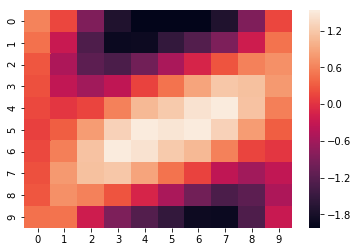

In [153]:
data_clustered=generate_fake_data(10,-3)
sns.heatmap(data_clustered)
coeff=wavedec2(data_clustered,'haar')

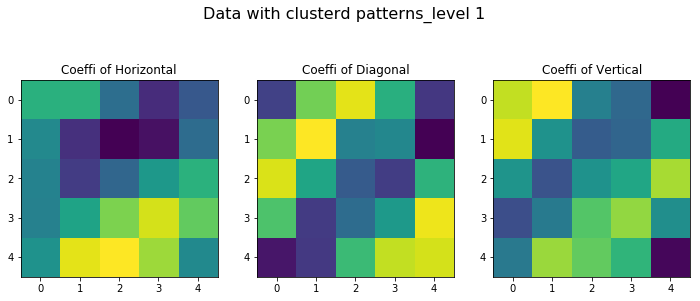

Mean of Horizontal_level(1)= -4.801714581503802e-17
Mean of Diagonal_level(1)= 0.0
Mean of Vertical_level(1)= -0.002681962939235727

Standard Deviation of Horizontal_level(1)= 0.59885
Standard Deviation of Diagonal_level(1)= 0.13870
Standard Deviation of Vertical_level(1)= 0.43902

Variance of Horizontal_level(1)= 0.35862
Variance Deviation of Diagonal_level(1)= 0.01924
Variance Deviation of Vertical_level(1)= 0.19274

Sum of variance_level(1)= 0.57060



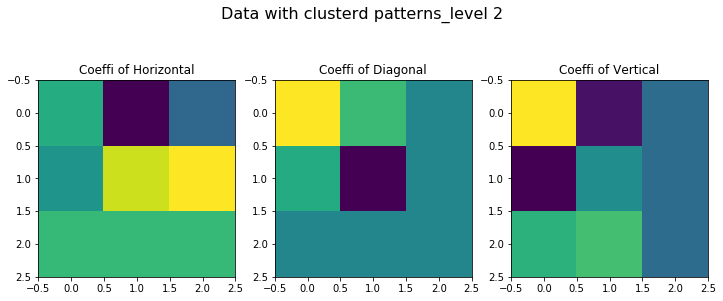

Mean of Horizontal_level(2)= -0.3775454108833512
Mean of Diagonal_level(2)= 0.08625820476811301
Mean of Vertical_level(2)= 0.32146562884461904

Standard Deviation of Horizontal_level(2)= 1.54950
Standard Deviation of Diagonal_level(2)= 0.42024
Standard Deviation of Vertical_level(2)= 1.13801

Variance of Horizontal_level(2)= 2.40095
Variance Deviation of Diagonal_level(2)= 0.17660
Variance Deviation of Vertical_level(2)= 1.29506

Sum of variance_level(2)= 3.87261



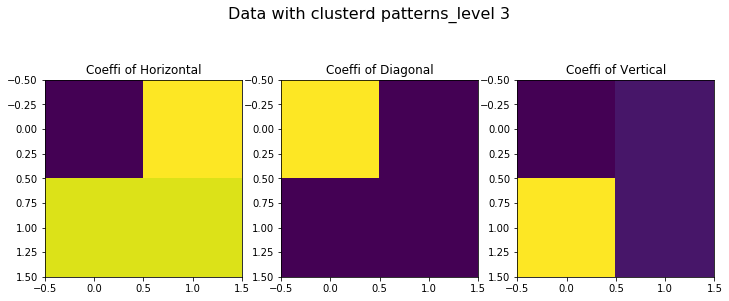

Mean of Horizontal_level(3)= -1.4031729225910778
Mean of Diagonal_level(3)= 0.3040491378158485
Mean of Vertical_level(3)= 1.3194341786452908

Standard Deviation of Horizontal_level(3)= 2.62146
Standard Deviation of Diagonal_level(3)= 0.52663
Standard Deviation of Vertical_level(3)= 2.49359

Variance of Horizontal_level(3)= 6.87203
Variance Deviation of Diagonal_level(3)= 0.27734
Variance Deviation of Vertical_level(3)= 6.21800

Sum of variance_level(3)= 13.36737



In [163]:
for i in range(len(coeff)-1):
    level=i+1
   
    cHn, cVn, cDn=coeff[-level]

    fig,axes=plt.subplots(nrows=1,ncols=3, figsize=(12,8))
    axes[0].imshow(cHn)
    axes[1].imshow(cDn)
    axes[2].imshow(cVn)
    fig.suptitle(f"Data with clusterd patterns_level {level}", fontsize=16,y=0.8)
    axes[0].set_title('Coeffi of Horizontal')
    axes[1].set_title('Coeffi of Diagonal')
    axes[2].set_title('Coeffi of Vertical')
    plt.show()
    print(f'Mean of Horizontal_level({level})= {cHn.mean()}')
    print(f'Mean of Diagonal_level({level})= {cDn.mean()}')
    print(f'Mean of Vertical_level({level})= {cVn.mean()}')
    print()
    print(f'Standard Deviation of Horizontal_level({level})= {cHn.std():.5f}')
    print(f'Standard Deviation of Diagonal_level({level})= {cDn.std():.5f}')
    print(f'Standard Deviation of Vertical_level({level})= {cVn.std():.5f}')
    print()
    print(f'Variance of Horizontal_level({level})= {cHn.var():.5f}')
    print(f'Variance Deviation of Diagonal_level({level})= {cDn.var():.5f}')
    print(f'Variance Deviation of Vertical_level({level})= {cVn.var():.5f}')
    print()
    sum_var=cHn.var() +cDn.var() +cVn.var()
    print(f'Sum of variance_level({level})= {sum_var:.5f}')
    print()